In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
sns.set(font_scale=1.5)

**************************************************

All sensitivity analysis data

**************************************************

**************************************************

Fomite transmission -- parcel workplace

**************************************************

In [3]:
df = pd.read_pickle('fomite_sweep_parcel.pkl',compression='bz2')
df['NRecovered'] = df['FracRecovered']*df['NStaff']

In [16]:
job = ['Driver','Picker','Office']
Nper_demand_val = len(df)/4
Dvals = [2000,3000,4000,5000]
df["DemandVal"] = np.zeros(len(df),dtype=np.int)
for i in np.arange(4):
    df.loc[i*Nper_demand_val:(i+1)*Nper_demand_val,"DemandVal"] = Dvals[i]
print(np.unique(df["DemandVal"]))
PFT = np.unique(df["p_fomite_trans"])
II = np.unique(df["InfInit"])
print(PFT,' ',II)
#parameter reminder
print('Pisol = ', np.unique(df['Pisol']))
print('Random contact rate = ', np.unique(df['p_contact']))
print('Staff totals = ', np.unique(df['NStaff']))

[2000 3000 4000 5000]
[0.0001 0.001  0.01  ]   [1 2 3]
Pisol =  [0.5]
Random contact rate =  [0.02941176]
Staff totals =  [10 20 38 68]


In [4]:
dfall = df[df["Group"]=='All']
dfall['outbreak'] = (dfall['NRecovered'] > 4)
dfall['Ninfected'] = (dfall.loc[:,'FracRecovered']*dfall.loc[:,'NStaff'] - 1)
dfall['InfJob'] = np.ones(len(dfall),dtype=np.object)

FR = np.sort(np.unique(dfall['FomiteRate']))
for i in np.arange(3):
    dfall.loc[dfall['InfInit']==i+1,'InfJob'] = job[i]

/Users/carlwhitfield/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/carlwhitfield/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/carlwhitfield/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

Index case to outbreak relation

Count customer infections

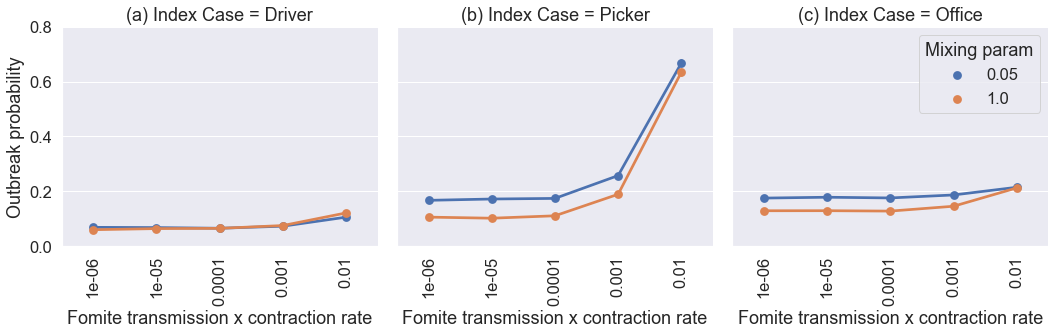

In [6]:
job = ['Driver','Picker','Office']
sp = sns.catplot(x='FomiteRate',y='outbreak', hue='phi',col='InfInit',data=dfall,kind='point',legend=False)
sp.set(xlabel='Fomite transmission x contraction rate',ylim=(0,0.8))
axes = sp.axes.flatten()
axes[0].set_ylabel('Outbreak probability')
lab = ['a','b','c']
for i in range(3):
    axes[i].set_title('(%s) Index Case = %s'%(lab[i],job[i]))
sp.set_xticklabels(rotation=90)
plt.legend(loc='upper right',title='Mixing param')
plt.tight_layout()
sp.savefig('param_sweep_outbreak_probability_fomite.png')

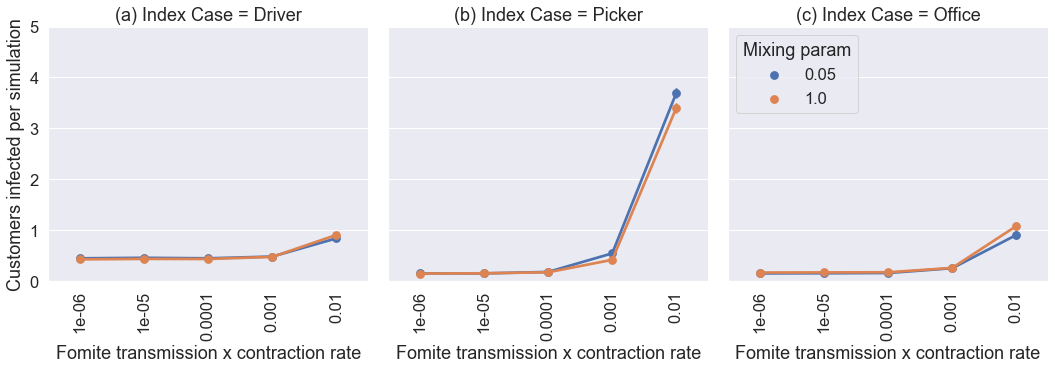

In [7]:
sp = sns.catplot(x='FomiteRate',y='CustomersInfectedByDrivers',col='InfInit',hue='phi',data=dfall,kind='point',legend=False)
sp.set(ylim=(0,5.0),xlabel='Fomite transmission x contraction rate')
axes = sp.axes.flatten()
axes[0].set_ylabel('Customers infected per simulation')
lab = ['a','b','c']
for i in range(3):
    axes[i].set_title('(%s) Index Case = %s'%(lab[i],job[i]))
plt.legend(loc='upper left',title='Mixing param')
sp.set_xticklabels(rotation=90)
sp.savefig('Customer_infections_fomite.png')

Only weak dependence on phi, and only for small phi. Might be worth showing how NN contacts for each group varies with phi and workplace size

In [8]:
#breakdown of infection causes in the model
jobtypes = np.unique(df['Group'])
print(jobtypes)
netinfs = np.zeros((len(jobtypes),len(FR),len(Phi),len(II)))
continfs = np.zeros((len(jobtypes),len(FR),len(Phi),len(II)))
roominfs = np.zeros((len(jobtypes),len(FR),len(Phi),len(II)))
fominfs = np.zeros((len(jobtypes),len(FR),len(Phi),len(II)))
for (n, g) in enumerate(jobtypes):
    dfg = df.loc[lambda df: (df['Group'] == g)]
    for (i,fr) in enumerate(FR):
        dfi =  dfg.loc[lambda dfg: (dfg['FomiteRate'] == fr)]
        for (j,phi) in enumerate(Phi):
            dfij =  dfi.loc[lambda dfi: (dfi['phi'] == phi)]
            for (k,ii) in enumerate(II):
                dfijk =  dfij.loc[lambda dfij: (dfij['InfInit'] == ii)]
                
                
                netinfs[n,i,j,k] = np.mean(dfijk['NetworkInfectionFrac']*dfijk['NStaff'])
                continfs[n,i,j,k] = np.mean(dfijk['ContactInfectionFrac']*dfijk['NStaff'])
                roominfs[n,i,j,k] = np.mean(dfijk['RoomInfectionFrac']*dfijk['NStaff'])
                fominfs[n,i,j,k] = np.mean(dfijk['FomiteInfectionFrac']*dfijk['NStaff'])
# for (i,td) in enumerate(TD):
#     for (j,phi) in enumerate(Phi):
#         for (k,ii) in enumerate(II):
#             norm = netinfs[jobtypes=='All',i,j,k][0] + \
#                    continfs[jobtypes=='All',i,j,k][0] + \
#                    roominfs[jobtypes=='All',i,j,k][0]
#             if norm > 0:
#                 for (n, g) in enumerate(jobtypes): 
#                     netinfs[n,i,j,k] /= norm
#                     continfs[n,i,j,k] /= norm
#                     roominfs[n,i,j,k] /= norm

['All' 'Drivers' 'Office' 'Pickers']


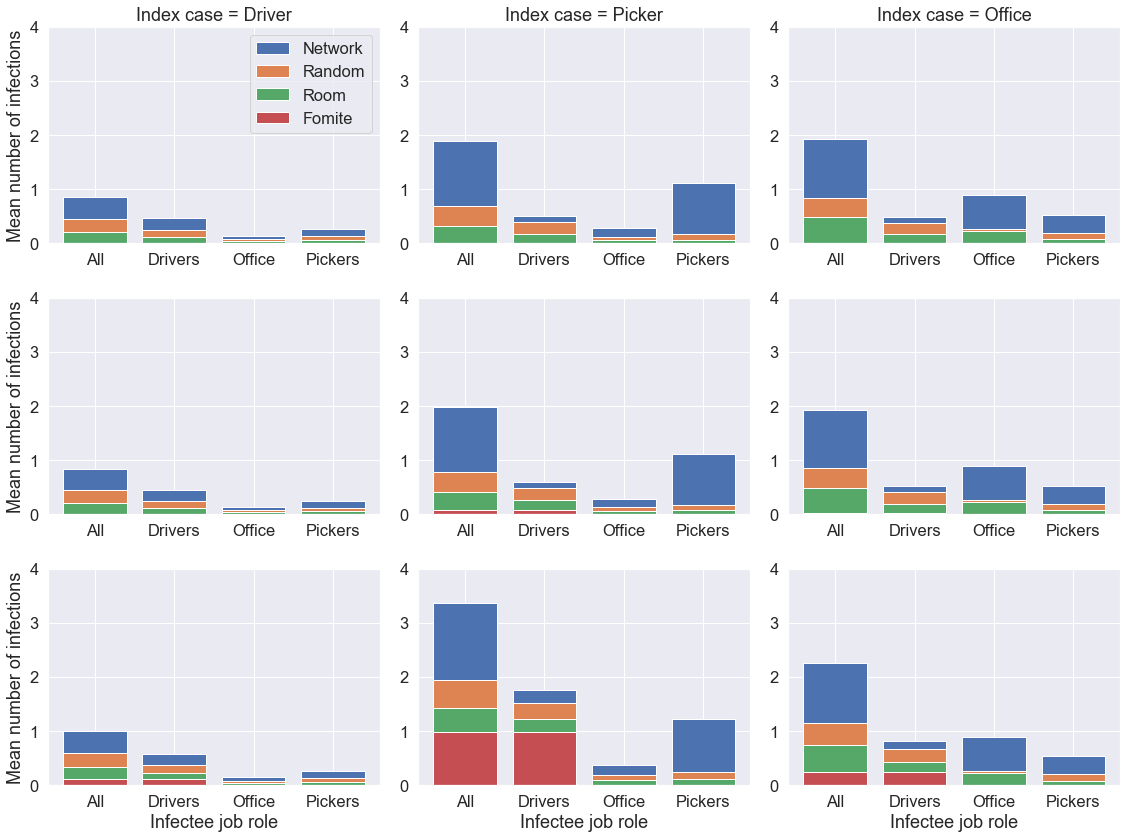

In [9]:
fig,ax = plt.subplots(3,3,figsize=(16,12))  
for k in np.arange(3):
    for i in np.arange(3):

        ax[i,k].bar(jobtypes, netinfs[:,i+1,0,k] + continfs[:,i+1,0,k] + \
                              roominfs[:,i+1,0,k] + fominfs[:,i+1,0,k],label='Network')
        ax[i,k].bar(jobtypes, continfs[:,i+1,0,k] + roominfs[:,i+1,0,k] + \
                              fominfs[:,i+1,0,k],label='Random')
        ax[i,k].bar(jobtypes, roominfs[:,i+1,0,k] + fominfs[:,i+1,0,k],label='Room')
        ax[i,k].bar(jobtypes, fominfs[:,i+1,0,k],label='Fomite')
        ax[i,k].set_ylim((0,4.0))
        ax[i,0].set_ylabel('Mean number of infections')
    
    ax[0,k].set_title('Index case = %s'%job[k])
    ax[2,k].set_xlabel('Infectee job role')
    
#ax[0,0].text(-2.0, 0.2, 'Mixing param = %.2f'%Phi[0], rotation='vertical',fontweight='bold',\
 #           bbox={'facecolor': 'white', 'alpha': 1.0, 'pad': 7.0, 'linestyle': '-',\
 #                 'edgecolor': 'black'})
#ax[1,0].text(-2.0, 0.2, 'Mixing param = %.2f'%Phi[len(Phi)-1], rotation='vertical',fontweight='bold',
#             bbox={'facecolor': 'white', 'alpha': 1.0, 'pad': 7.0, 'linestyle': '-',\
#                   'edgecolor': 'black'})

ax[0,0].legend()
fig.tight_layout()
fig.savefig('infection_routes_fomite.png')
####need to extract for tD = 0.25, like the rest

**************************************************

Fomite transmission -- large-item workplace

**************************************************

In [10]:
df = pd.read_pickle('param_sweep_pairs_fomite.pkl',compression='bz2')

In [11]:
df['NRecovered'] = df['FracRecovered']*df['NStaff']
job = ['Driver','Picker','Office']
print(len(df))
x = (df.loc[:,'p_fomite_trans']*df.loc[:,'p_fomite_contr']).to_numpy()
for i in np.arange(len(x)):
    x[i] = np.round(x[i], -int(np.floor(np.log10(np.abs(x[i])))))
df['FomiteRate'] = x

PFT = np.unique(df["p_fomite_trans"])
PFC = np.unique(df["p_fomite_contr"])
II = np.unique(df["InfInit"])
FP = np.unique(df["fixed_driver_pairs"])
WO = np.unique(df["is_window_open"])
PI = np.unique(df["pair_isolation"])
FR = np.sort(np.unique(df['FomiteRate']))

#parameter reminder
print('Pisol = ', np.unique(df['Pisol']))
print('Random contact rate = ', np.unique(df['p_contact']))
print('Friend contact prob = ', np.unique(df['p_friend_contact']))
print('Staff totals = ', np.unique(df['NStaff']))

8640000
Pisol =  [0.5]
Random contact rate =  [0.04545455]
Friend contact prob =  [1.]
Staff totals =  [ 8 16 20 44]


In [12]:
job = ['Driver','Picker','Office']
jobtypes = np.unique(df['Group'])
netinfs = np.zeros((len(jobtypes),len(FR),len(II),len(FP),len(WO),len(PI)))
continfs = np.zeros((len(jobtypes),len(FR),len(II),len(FP),len(WO),len(PI)))
roominfs = np.zeros((len(jobtypes),len(FR),len(II),len(FP),len(WO),len(PI)))
pairinfs = np.zeros((len(jobtypes),len(FR),len(II),len(FP),len(WO),len(PI)))
fominfs = np.zeros((len(jobtypes),len(FR),len(II),len(FP),len(WO),len(PI)))
for (n, g) in enumerate(jobtypes):
    dfg = df.loc[lambda dfpairs: (dfpairs['Group'] == g)]
    for (i,fr) in enumerate(FR):
        dfi =  dfg.loc[lambda dfg: (dfg['FomiteRate'] == fr)]
        for (j,ii) in enumerate(II):
            dfij =  dfi.loc[lambda dfi: (dfi['InfInit'] == ii)]
            for (k,fp) in enumerate(FP):
                dfijk =  dfij.loc[lambda dfij: (dfij['fixed_driver_pairs'] == fp)]
                for (l,wo) in enumerate(WO):
                    dfijkl = dfijk.loc[lambda dfijk: (dfijk['is_window_open'] == wo)]
                    for (m,pi) in enumerate(PI):
                        dfijklm = dfijkl.loc[lambda dfijkl: (dfijkl['pair_isolation'] == pi)]
                        netinfs[n,i,j,k,l,m] = np.mean(dfijklm['NetworkInfectionFrac']\
                                                      *dfijklm['NStaff'])
                        continfs[n,i,j,k,l,m] = np.mean(dfijklm['ContactInfectionFrac']\
                                                      *dfijklm['NStaff'])
                        roominfs[n,i,j,k,l,m] = np.mean(dfijklm['RoomInfectionFrac']\
                                                      *dfijklm['NStaff'])
                        pairinfs[n,i,j,k,l,m] = np.mean(dfijklm['PairInfectionFrac']\
                                                      *dfijklm['NStaff'])
                        fominfs[n,i,j,k,l,m] = np.mean(dfijklm['FomiteInfectionFrac']\
                                                      *dfijklm['NStaff'])

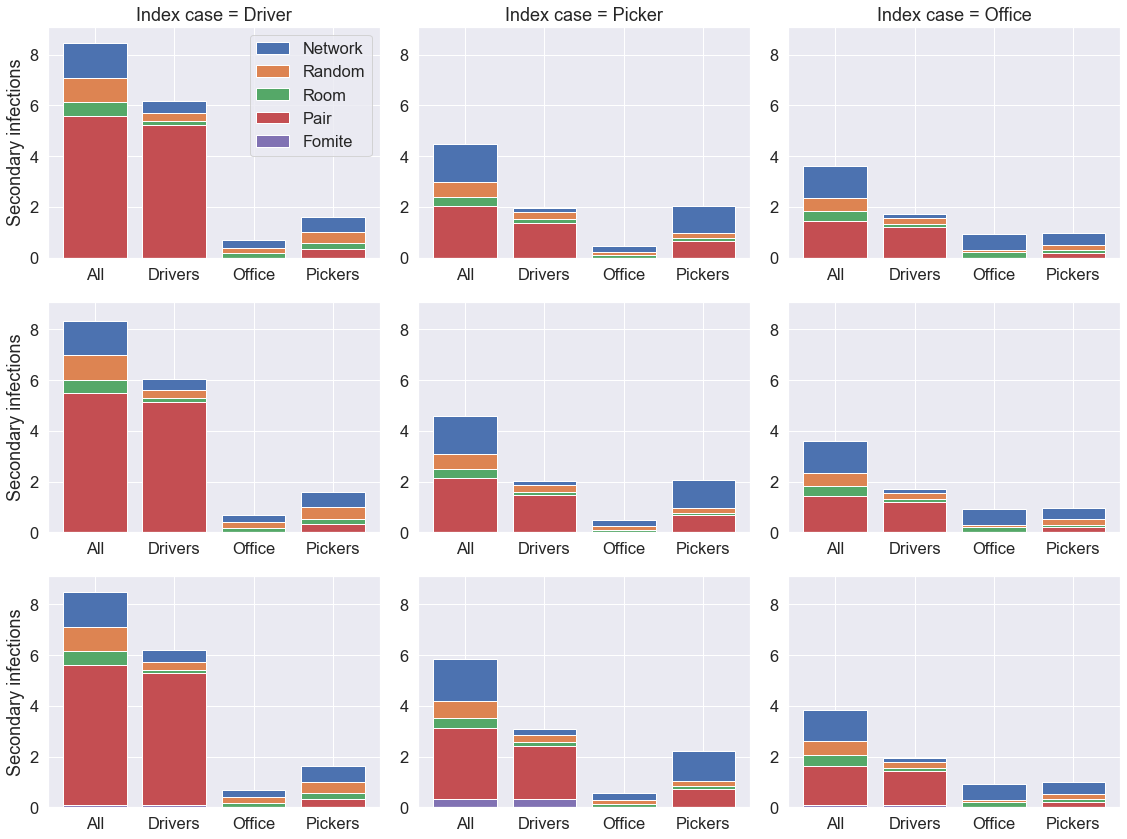

In [13]:
fig,ax = plt.subplots(3,3,figsize=(16,12))  
for i in np.arange(3):
    for j in np.arange(3):
        k,l,m = 0,0,0
        ax[i,j].bar(jobtypes, netinfs[:,i+1,j,k,l,m]+continfs[:,i+1,j,k,l,m]+\
                          roominfs[:,i+1,j,k,l,m]+pairinfs[:,i+1,j,k,l,m]+\
                          fominfs[:,i+1,j,k,l,m],label='Network')
        ax[i,j].bar(jobtypes, continfs[:,i+1,j,k,l,m]+roominfs[:,i+1,j,k,l,m]+\
                              pairinfs[:,i+1,j,k,l,m]+fominfs[:,i+1,j,k,l,m],label='Random')
        ax[i,j].bar(jobtypes, roominfs[:,i+1,j,k,l,m]+ pairinfs[:,i+1,j,k,l,m]+\
                              fominfs[:,i+1,j,k,l,m],label='Room')
        ax[i,j].bar(jobtypes, pairinfs[:,i+1,j,k,l,m]+ fominfs[:,i+1,j,k,l,m],label='Pair')
        ax[i,j].bar(jobtypes, fominfs[:,i+1,j,k,l,m],label='Fomite')
        ax[i,j].set_ylim((0,9.1))
    
        
        ax[0,j].set_title('Index case = %s'%job[j])
    ax[i,0].set_ylabel('Secondary infections')
ax[0,0].legend()
fig.tight_layout()
fig.savefig('pair_infection_routes_fomite_nointerv.png')
####need to extract for tD = 0.25, like the rest